### Analytics Vidya ML Hiring Hackathon

**Link:**https://datahack.analyticsvidhya.com/contest/india-ml-hiring-hackathon-2019/

#### Import Necessary Libraries 

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix as cm
pd.set_option('display.max_columns', None)

#### Import Data

In [2]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

sample_df = pd.read_csv('sample_submission.csv')

In [12]:
train_df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Source
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,train
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,train
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,train
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,train
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,train


In [13]:
test_df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Source
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,test
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,test
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,test
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,test
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,test


In [9]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [27]:
df = pd.concat([train_df, test_df], axis=0)

#### EDA

In [28]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Source
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,train
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,train
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,train
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,train
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0,train


In [29]:
df['source']

0        Z
1        Y
2        Z
3        X
4        X
        ..
35861    X
35862    Z
35863    X
35864    Y
35865    X
Name: source, Length: 151924, dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151924 entries, 0 to 35865
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   151924 non-null  int64  
 1   source                    151924 non-null  object 
 2   financial_institution     151924 non-null  object 
 3   interest_rate             151924 non-null  float64
 4   unpaid_principal_bal      151924 non-null  int64  
 5   loan_term                 151924 non-null  int64  
 6   origination_date          151924 non-null  object 
 7   first_payment_date        151924 non-null  object 
 8   loan_to_value             151924 non-null  int64  
 9   number_of_borrowers       151924 non-null  float64
 10  debt_to_income_ratio      151924 non-null  float64
 11  borrower_credit_score     151924 non-null  float64
 12  loan_purpose              151924 non-null  object 
 13  insurance_percent         151924 non-null  fl

In [32]:
def func(x):
    print('No. of Unique Elements:',df[x].nunique())
    print('Value Counts:\n', df[x].value_counts())

In [33]:
for i in df.columns:
    func(i)

No. of Unique Elements: 151924
Value Counts:
 2049            1
625832297013    1
998250465766    1
689938854608    1
261148801690    1
               ..
181721892138    1
684179924238    1
4792            1
976769402210    1
2047            1
Name: loan_id, Length: 151924, dtype: int64
No. of Unique Elements: 3
Value Counts:
 X    83572
Y    49207
Z    19145
Name: source, dtype: int64
No. of Unique Elements: 19
Value Counts:
 OTHER                          64861
Browning-Hart                  41930
Swanson, Newton and Miller      8969
Edwards-Hoffman                 6387
Martinez, Duffy and Bird        6163
Miller, Mcclure and Allen       4070
Nicholson Group                 2712
Turner, Baldwin and Rhodes      2388
Suarez Inc                      2376
Cole, Brooks and Vincent        2134
Richards-Walters                1921
Taylor, Hunt and Rodriguez      1656
Sanchez-Robinson                1577
Sanchez, Hays and Wilkerson     1142
Romero, Woods and Johnson        991
Thornton-Davis

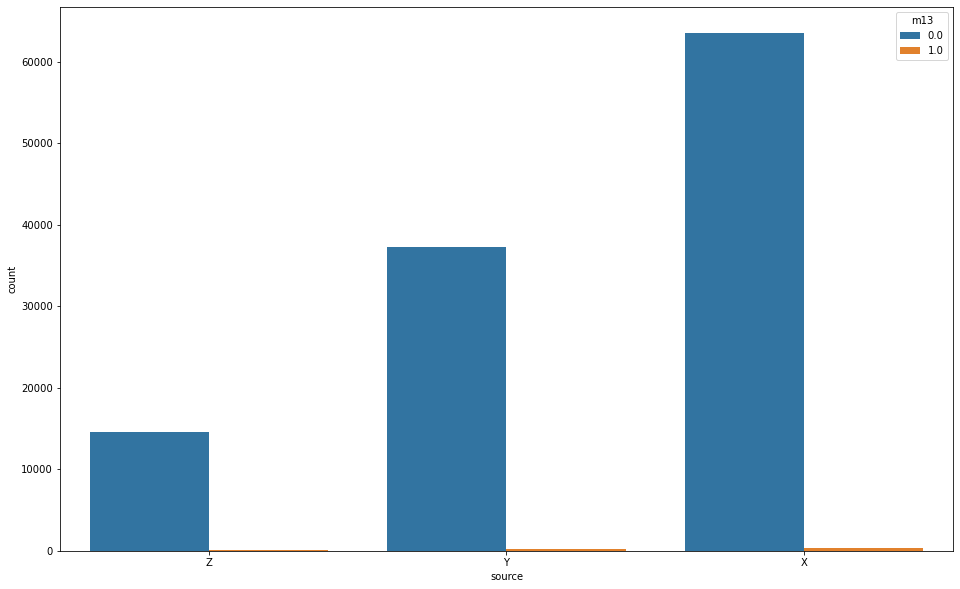

In [36]:
plt.figure(figsize=(16,10))
sns.countplot(x = df['source'], hue = df['m13']);

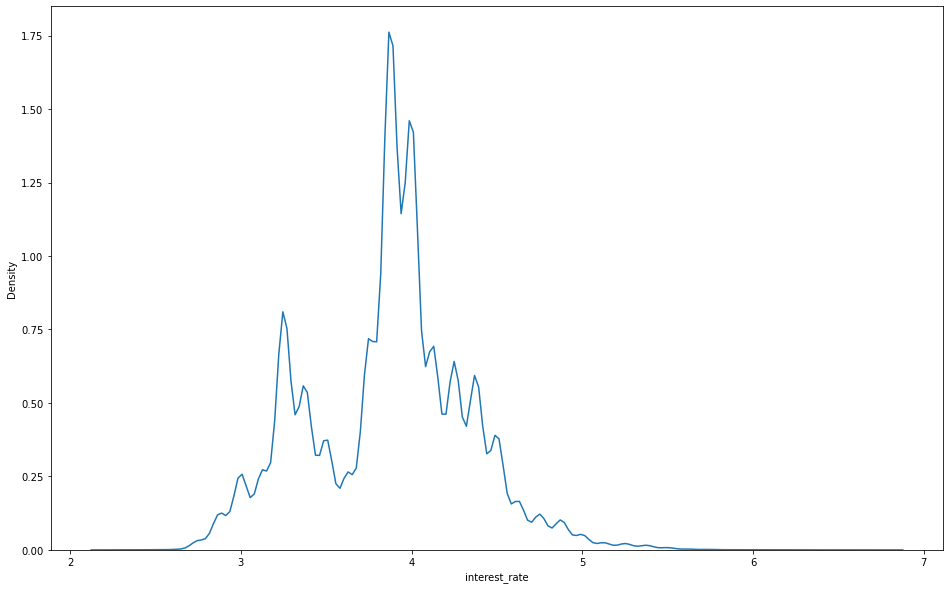

In [38]:
plt.figure(figsize=(16,10))
sns.kdeplot(df['interest_rate']);

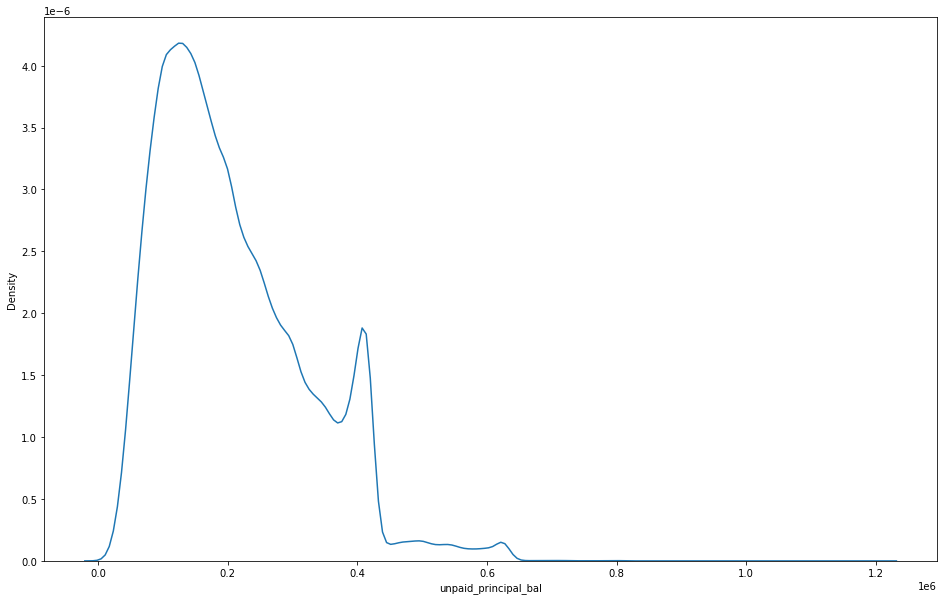

In [40]:
plt.figure(figsize=(16,10))
sns.kdeplot(df['unpaid_principal_bal']);

#### Feature Engineering

In [44]:
df['origination_date'].unique()

array(['2012-03-01', '2012-01-01', '2012-02-01', '01/02/12', '01/01/12',
       '01/03/12'], dtype=object)

In [53]:
df['origination_date']=df['origination_date'].str.replace('01/02/12','2012-02-01').replace('01/01/12','2012-01-01').replace('01/03/12','2012-03-01')

In [54]:
df['origination_date']

0        2012-03-01
1        2012-01-01
2        2012-01-01
3        2012-02-01
4        2012-02-01
            ...    
35861    2012-01-01
35862    2012-01-01
35863    2012-02-01
35864    2012-02-01
35865    2012-02-01
Name: origination_date, Length: 151924, dtype: object

In [57]:
df['first_payment_date'].unique()

array(['05/2012', '03/2012', '04/2012', '02/2012', 'Apr-12', 'Mar-12',
       'May-12', 'Feb-12'], dtype=object)

In [59]:
df['first_payment_date']=df['first_payment_date'].str.replace('Apr-12','04/2012').replace('Mar-12','03/2012').replace('May-12','05/2012').replace('Feb-12','02/2012')

In [60]:
df

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Source
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,train
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,train
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,train
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,train
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35861,35862,X,OTHER,4.125,232000,240,2012-01-01,04/2012,80,2.0,30.0,684.0,C86,0.0,712.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test
35862,35863,Z,Edwards-Hoffman,3.375,204000,180,2012-01-01,03/2012,80,1.0,30.0,812.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test
35863,35864,X,Browning-Hart,4.250,200000,360,2012-02-01,04/2012,52,2.0,38.0,624.0,B12,0.0,646.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
35864,35865,Y,Edwards-Hoffman,4.375,400000,360,2012-02-01,04/2012,66,1.0,34.0,753.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test


#### Encoding

In [62]:
cat_col = df.select_dtypes(exclude = np.number).columns

cat_col

Index(['source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose', 'Source'],
      dtype='object')

In [69]:
df1 = df.copy()

In [65]:
le  = LabelEncoder()
def encoding(x):
    df1[x] = le.fit_transform(df1[x])

In [70]:
for i in cat_col[:-1]:
    encoding(i)

In [73]:
df1.drop('loan_id', axis=1, inplace=True)

In [74]:
df1

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Source
0,2,18,4.250,214000,360,2,3,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,train
1,1,15,4.875,144000,360,0,1,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,train
2,2,17,3.250,366000,180,0,1,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,train
3,0,8,4.750,135000,360,1,2,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,train
4,0,8,4.750,124000,360,1,2,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35861,0,8,4.125,232000,240,0,2,80,2.0,30.0,684.0,2,0.0,712.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test
35862,2,4,3.375,204000,180,0,1,80,1.0,30.0,812.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test
35863,0,1,4.250,200000,360,1,2,52,2.0,38.0,624.0,1,0.0,646.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,test
35864,1,4,4.375,400000,360,1,2,66,1.0,34.0,753.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,test


#### Scaling

In [76]:
sc = StandardScaler()

sc.fit(df1.iloc[:,:-2])

StandardScaler()

In [77]:
sc.transform(df1.iloc[:,:-2])

array([[ 2.02150066,  2.57884102,  0.82472583, ..., -0.04466801,
        -0.04355216, -0.04531809],
       [ 0.60198115,  1.90558814,  2.18075048, ..., -0.04466801,
         6.28208725, -0.04531809],
       [ 2.02150066,  2.3544234 , -1.34491361, ..., -0.04466801,
        -0.04355216, -0.04531809],
       ...,
       [-0.81753837, -1.23625863,  0.82472583, ..., -0.04466801,
        -0.04355216, -0.04531809],
       [ 0.60198115, -0.56300575,  1.09593076, ..., -0.04466801,
        -0.04355216, -0.04531809],
       [-0.81753837,  0.33466476,  1.09593076, ..., -0.04466801,
        -0.04355216, -0.04531809]])

In [94]:
df_scaled = pd.DataFrame(data=sc.transform(df1.iloc[:,:-2]), columns=df1.columns[:-2], index= df1.index)

#### Spliting

In [101]:
df_scaled.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,2.021501,2.578841,0.824726,0.051308,0.753107,1.913946,1.878619,1.595877,-1.209669,-0.899021,-1.803096,1.528098,3.369442,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,10.189664,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
1,0.601981,1.905588,2.180750,-0.559217,0.753107,-1.037404,-1.032557,0.264936,-1.209669,1.362111,-1.731853,0.314458,-0.343150,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,6.282087,-0.045318
2,2.021501,2.354423,-1.344914,1.377019,-1.254627,-1.037404,-1.032557,-1.066005,-1.209669,0.231545,0.239219,0.314458,-0.343150,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
3,-0.817538,0.334665,1.909546,-0.637714,0.753107,0.438271,0.423031,-1.239606,0.826672,1.362111,-3.251716,0.314458,-0.343150,0.465487,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,8.147976,6.973060,6.282087,5.696888
4,-0.817538,0.334665,1.909546,-0.733653,0.753107,0.438271,0.423031,0.727872,-1.209669,1.259332,-2.111819,1.528098,-0.343150,-1.205558,-0.057,-0.049644,18.728077,35.830706,48.758849,49.830468,60.091846,61.341345,64.359803,65.477010,63.114882,63.212842,63.118947


In [102]:
df1.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,Source
0,2,18,4.250,214000,360,2,3,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,train
1,1,15,4.875,144000,360,0,1,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,train
2,2,17,3.250,366000,180,0,1,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,train
3,0,8,4.750,135000,360,1,2,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,train
4,0,8,4.750,124000,360,1,2,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0,train


In [112]:
test_data

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.601981,-1.236259,0.011111,1.821830,0.753107,0.438271,0.423031,0.438537,-1.209669,-1.104578,0.476697,-0.899182,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
1,-0.817538,0.334665,1.367136,-0.829593,0.753107,0.438271,0.423031,0.727872,0.826672,0.231545,0.547941,1.528098,-0.34315,0.847889,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
2,0.601981,0.334665,1.367136,-1.187186,0.753107,-1.037404,-1.032557,0.438537,-1.209669,0.334324,-1.423131,1.528098,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
3,-0.817538,-0.114170,0.553521,-0.742375,-1.254627,0.438271,0.423031,-1.528941,0.826672,-0.693463,0.666680,-0.899182,-0.34315,0.923845,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
4,-0.817538,-1.236259,-1.344914,-0.367338,-1.254627,0.438271,0.423031,-0.834537,0.826672,-1.926808,-0.069503,-0.899182,-0.34315,0.805982,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35861,-0.817538,0.334665,0.553521,0.208300,-0.585382,-1.037404,0.423031,0.727872,0.826672,-0.076791,-2.040575,1.528098,-0.34315,0.659307,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
35862,2.021501,-0.563006,-1.073709,-0.035910,-1.254627,-1.037404,-1.032557,0.727872,-1.209669,-0.076791,0.999150,0.314458,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
35863,-0.817538,-1.236259,0.824726,-0.070797,0.753107,0.438271,0.423031,-0.892404,0.826672,0.745439,-3.465446,0.314458,-0.34315,0.486440,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,8.147976,-0.044668,-0.043552,-0.045318
35864,0.601981,-0.563006,1.095931,1.673560,0.753107,0.438271,0.423031,-0.082266,-1.209669,0.334324,-0.401973,-0.899182,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318


In [103]:
train_data = df_scaled.iloc[:-35866]

test_data = df_scaled.iloc[-35866:]

y = df1.iloc[:-35866, -2]

In [99]:
train_data.tail()
#train data got splitted

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
116053,0.601981,-1.236259,0.553521,-0.480721,0.753107,0.438271,0.423031,1.190808,0.826672,-0.899021,0.737924,-0.899182,2.750677,0.895034,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
116054,2.021501,0.334665,-1.887323,-0.506887,-1.923871,-1.037404,-1.032557,-1.876143,-1.209669,0.642660,0.619185,0.314458,-0.343150,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
116055,-0.817538,0.334665,0.011111,-0.367338,0.753107,0.438271,0.423031,-0.545202,0.826672,1.876005,-1.090661,0.314458,-0.343150,0.688118,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
116056,-0.817538,0.334665,0.824726,-0.341173,0.753107,0.438271,0.423031,0.380670,0.826672,-1.824029,-0.354477,-0.899182,-0.343150,0.748359,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
116057,2.021501,2.354423,-1.073709,0.382736,-1.254627,-1.037404,-1.032557,-2.223345,0.826672,0.950996,0.001740,-0.899182,-0.343150,0.800743,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318


In [100]:
test_data.head()
#test data got splitted

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.601981,-1.236259,0.011111,1.821830,0.753107,0.438271,0.423031,0.438537,-1.209669,-1.104578,0.476697,-0.899182,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
1,-0.817538,0.334665,1.367136,-0.829593,0.753107,0.438271,0.423031,0.727872,0.826672,0.231545,0.547941,1.528098,-0.34315,0.847889,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
2,0.601981,0.334665,1.367136,-1.187186,0.753107,-1.037404,-1.032557,0.438537,-1.209669,0.334324,-1.423131,1.528098,-0.34315,-1.205558,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
3,-0.817538,-0.114170,0.553521,-0.742375,-1.254627,0.438271,0.423031,-1.528941,0.826672,-0.693463,0.666680,-0.899182,-0.34315,0.923845,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318
4,-0.817538,-1.236259,-1.344914,-0.367338,-1.254627,0.438271,0.423031,-0.834537,0.826672,-1.926808,-0.069503,-0.899182,-0.34315,0.805982,-0.057,-0.049644,-0.039778,-0.035294,-0.034794,-0.041608,-0.038154,-0.040672,-0.041906,-0.041886,-0.044668,-0.043552,-0.045318


In [108]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3, random_state=100)

### Modelling

In [135]:
def metrics(y_true,y_pred):
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

def prediction(model,val='no',X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, test=test_data):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    actual = [y_train, y_test]
    pred = [train_pred, test_pred]
    sam = ['Train','Test']
    #confusion_matrix(model, X_train, y_train, X_test, y_test)
    cm(y_test, test_pred)
   
    for i in range(2):
        print(sam[i]+' Metrics\n')
        metrics(actual[i],pred[i])
    if val=='o':
        X = pd.concat([X_train,X_test]).sort_index()
        y = pd.concat([y_train, y_test]).sort_index()
        model.fit(X,y)
        finalpred = model.predict(test)
        sample_df['Response'] = finalpred
        sample_df.to_csv(str(model)[:10]+'Pred.csv',index=False)
        print('Done')
    elif val == 's':
        model.fit(X_full_sm,y_full_sm)
        finalpred = model.predict(test)
        sample_df['Response'] = finalpred
        sample_df.to_csv(str(model)[:10]+'SMOTEPred.csv',index=False)
        print('Smote done')
    else:
        pass

### Modelling

#### Logistic Regreesion

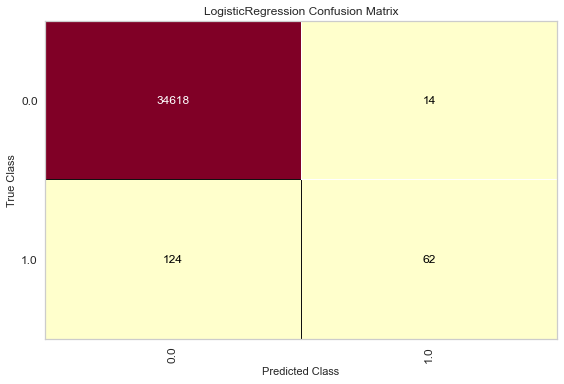

Train Metrics



Accuracy Score:
 0.9961472181191531


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       0.87      0.36      0.51       450

    accuracy                           1.00     81240
   macro avg       0.93      0.68      0.75     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9960365328278477


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.82      0.33      0.47       186

    accuracy                           1.00     34818
   macro avg       0.91      0.67      0.74     34818
weighted avg       1.00      1.00      1.00     34818

Done


In [120]:
model = LogisticRegression()

prediction(model, val='o')

#### KNN

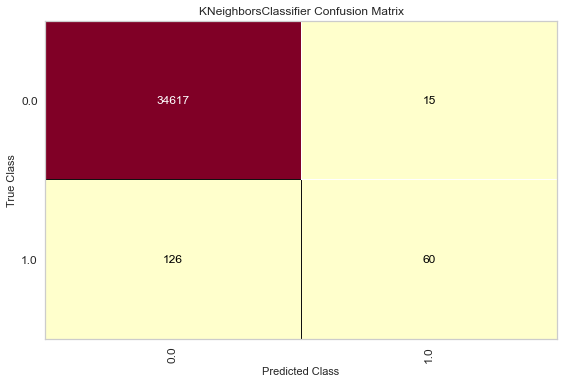

Train Metrics



Accuracy Score:
 0.9961349089118661


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       0.91      0.34      0.49       450

    accuracy                           1.00     81240
   macro avg       0.95      0.67      0.74     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9959503704980183


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.80      0.32      0.46       186

    accuracy                           1.00     34818
   macro avg       0.90      0.66      0.73     34818
weighted avg       1.00      1.00      1.00     34818



In [122]:
model = KNeighborsClassifier()

prediction(model)

#### Naive Bayes

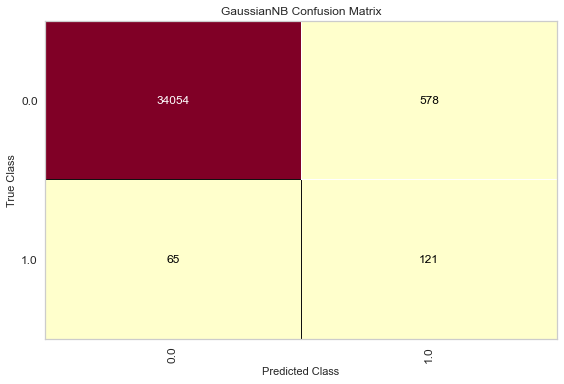

Train Metrics



Accuracy Score:
 0.9802191038897095


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     80790
         1.0       0.16      0.63      0.26       450

    accuracy                           0.98     81240
   macro avg       0.58      0.81      0.63     81240
weighted avg       0.99      0.98      0.99     81240

Test Metrics



Accuracy Score:
 0.9815325406398989


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     34632
         1.0       0.17      0.65      0.27       186

    accuracy                           0.98     34818
   macro avg       0.59      0.82      0.63     34818
weighted avg       0.99      0.98      0.99     34818



In [123]:
nb = GaussianNB()

prediction(nb)

#### Decsion Tree

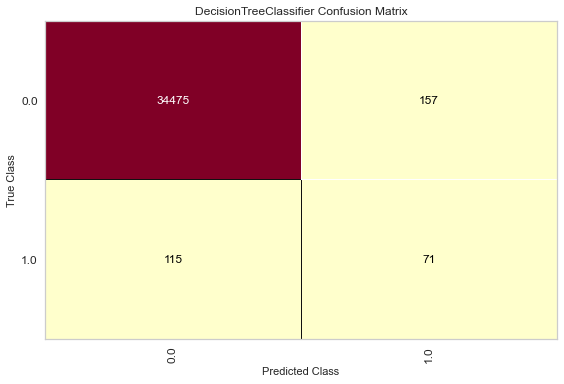

Train Metrics



Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       1.00      1.00      1.00       450

    accuracy                           1.00     81240
   macro avg       1.00      1.00      1.00     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9921879487621346


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.31      0.38      0.34       186

    accuracy                           0.99     34818
   macro avg       0.65      0.69      0.67     34818
weighted avg       0.99      0.99      0.99     34818



In [124]:
dtree = DecisionTreeClassifier()

prediction(dtree)

#### Bagging Classifer

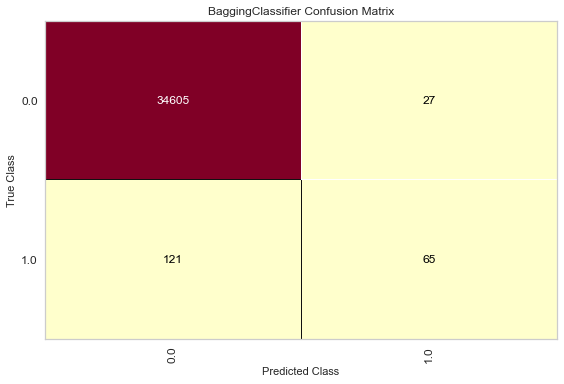

Train Metrics



Accuracy Score:
 0.9991137370753324


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       1.00      0.84      0.91       450

    accuracy                           1.00     81240
   macro avg       1.00      0.92      0.96     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9957493250617496


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.71      0.35      0.47       186

    accuracy                           1.00     34818
   macro avg       0.85      0.67      0.73     34818
weighted avg       0.99      1.00      1.00     34818



In [126]:
bag = BaggingClassifier()

prediction(bag)

#### Ada Boost

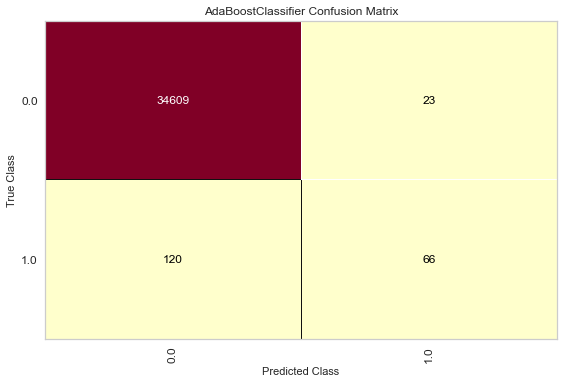

Train Metrics



Accuracy Score:
 0.9958271787296898


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       0.75      0.37      0.49       450

    accuracy                           1.00     81240
   macro avg       0.87      0.68      0.75     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9958929289447986


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.74      0.35      0.48       186

    accuracy                           1.00     34818
   macro avg       0.87      0.68      0.74     34818
weighted avg       1.00      1.00      1.00     34818



In [127]:
ada = AdaBoostClassifier()

prediction(ada)

#### Gradient Boosting

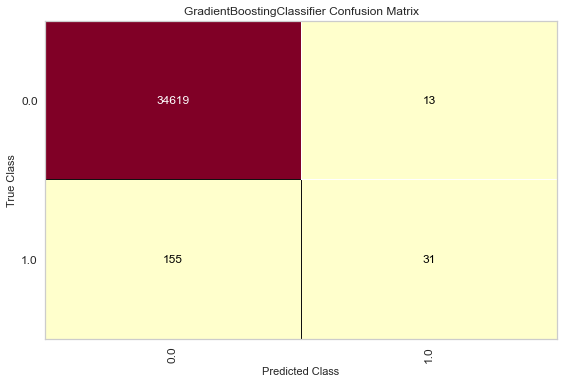

Train Metrics



Accuracy Score:
 0.9949778434268833


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       0.71      0.16      0.26       450

    accuracy                           0.99     81240
   macro avg       0.85      0.58      0.63     81240
weighted avg       0.99      0.99      0.99     81240

Test Metrics



Accuracy Score:
 0.9951749095295537


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.70      0.17      0.27       186

    accuracy                           1.00     34818
   macro avg       0.85      0.58      0.63     34818
weighted avg       0.99      1.00      0.99     34818



In [128]:
grad = GradientBoostingClassifier()

prediction(grad)

#### LGBM

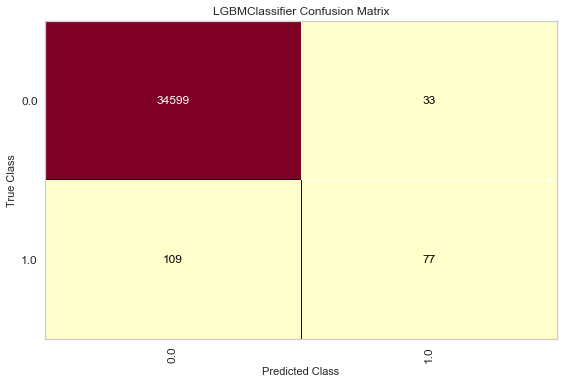

Train Metrics



Accuracy Score:
 0.9983505662235352


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       0.98      0.71      0.83       450

    accuracy                           1.00     81240
   macro avg       0.99      0.86      0.91     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9959216497214085


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.70      0.41      0.52       186

    accuracy                           1.00     34818
   macro avg       0.85      0.71      0.76     34818
weighted avg       1.00      1.00      1.00     34818



In [129]:
lgbm = LGBMClassifier()

prediction(lgbm)

#### XGBoost

/Applications/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


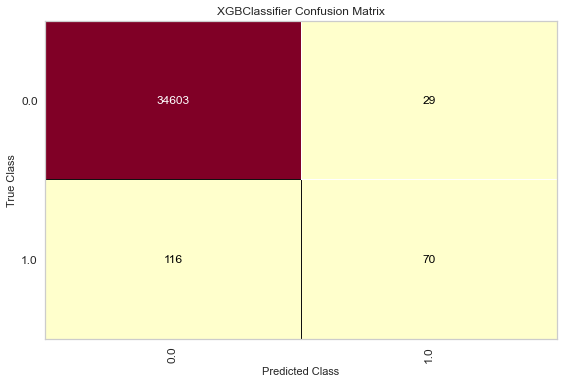

Train Metrics



Accuracy Score:
 0.9982274741506647


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80790
         1.0       1.00      0.68      0.81       450

    accuracy                           1.00     81240
   macro avg       1.00      0.84      0.90     81240
weighted avg       1.00      1.00      1.00     81240

Test Metrics



Accuracy Score:
 0.9958354873915791


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34632
         1.0       0.71      0.38      0.49       186

    accuracy                           1.00     34818
   macro avg       0.85      0.69      0.74     34818
weighted avg       1.00      1.00      1.00     34818



In [130]:
xgb = XGBClassifier()

prediction(xgb)

#### Cat Boost

In [136]:
cat = CatBoostClassifier()
prediction(cat)

Learning rate set to 0.067361
0:	learn: 0.5261577	total: 44.4ms	remaining: 44.4s
1:	learn: 0.4001171	total: 90.6ms	remaining: 45.2s
2:	learn: 0.2979466	total: 129ms	remaining: 43s
3:	learn: 0.2243601	total: 181ms	remaining: 45s
4:	learn: 0.1707258	total: 227ms	remaining: 45.2s
5:	learn: 0.1363707	total: 262ms	remaining: 43.4s
6:	learn: 0.1076328	total: 297ms	remaining: 42.1s
7:	learn: 0.0868632	total: 323ms	remaining: 40.1s
8:	learn: 0.0711053	total: 368ms	remaining: 40.5s
9:	learn: 0.0605186	total: 401ms	remaining: 39.7s
10:	learn: 0.0518887	total: 435ms	remaining: 39.1s
11:	learn: 0.0452992	total: 479ms	remaining: 39.4s
12:	learn: 0.0399695	total: 512ms	remaining: 38.9s
13:	learn: 0.0361223	total: 538ms	remaining: 37.9s
14:	learn: 0.0329286	total: 565ms	remaining: 37.1s
15:	learn: 0.0304537	total: 590ms	remaining: 36.3s
16:	learn: 0.0284372	total: 616ms	remaining: 35.6s
17:	learn: 0.0268408	total: 647ms	remaining: 35.3s
18:	learn: 0.0255522	total: 691ms	remaining: 35.7s
19:	learn: 0.

160:	learn: 0.0158513	total: 7.28s	remaining: 37.9s
161:	learn: 0.0158390	total: 7.31s	remaining: 37.8s
162:	learn: 0.0158299	total: 7.33s	remaining: 37.7s
163:	learn: 0.0158231	total: 7.38s	remaining: 37.6s
164:	learn: 0.0158208	total: 7.42s	remaining: 37.6s
165:	learn: 0.0158103	total: 7.47s	remaining: 37.5s
166:	learn: 0.0157933	total: 7.51s	remaining: 37.5s
167:	learn: 0.0157845	total: 7.54s	remaining: 37.4s
168:	learn: 0.0157789	total: 7.57s	remaining: 37.2s
169:	learn: 0.0157693	total: 7.6s	remaining: 37.1s
170:	learn: 0.0157630	total: 7.63s	remaining: 37s
171:	learn: 0.0157559	total: 7.67s	remaining: 36.9s
172:	learn: 0.0157378	total: 7.71s	remaining: 36.8s
173:	learn: 0.0157238	total: 7.75s	remaining: 36.8s
174:	learn: 0.0157158	total: 7.78s	remaining: 36.7s
175:	learn: 0.0157067	total: 7.83s	remaining: 36.7s
176:	learn: 0.0156898	total: 7.87s	remaining: 36.6s
177:	learn: 0.0156691	total: 7.9s	remaining: 36.5s
178:	learn: 0.0156629	total: 7.93s	remaining: 36.4s
179:	learn: 0.01

322:	learn: 0.0143537	total: 12.6s	remaining: 26.3s
323:	learn: 0.0143444	total: 12.6s	remaining: 26.3s
324:	learn: 0.0143353	total: 12.6s	remaining: 26.3s
325:	learn: 0.0143279	total: 12.7s	remaining: 26.2s
326:	learn: 0.0143164	total: 12.7s	remaining: 26.2s
327:	learn: 0.0143072	total: 12.7s	remaining: 26.1s
328:	learn: 0.0142901	total: 12.8s	remaining: 26.1s
329:	learn: 0.0142760	total: 12.8s	remaining: 26s
330:	learn: 0.0142634	total: 12.9s	remaining: 26s
331:	learn: 0.0142587	total: 12.9s	remaining: 25.9s
332:	learn: 0.0142555	total: 12.9s	remaining: 25.9s
333:	learn: 0.0142523	total: 12.9s	remaining: 25.8s
334:	learn: 0.0142461	total: 13s	remaining: 25.8s
335:	learn: 0.0142403	total: 13s	remaining: 25.7s
336:	learn: 0.0142240	total: 13.1s	remaining: 25.7s
337:	learn: 0.0142150	total: 13.1s	remaining: 25.6s
338:	learn: 0.0142012	total: 13.1s	remaining: 25.6s
339:	learn: 0.0141887	total: 13.1s	remaining: 25.5s
340:	learn: 0.0141837	total: 13.2s	remaining: 25.5s
341:	learn: 0.014178

481:	learn: 0.0128641	total: 17.8s	remaining: 19.1s
482:	learn: 0.0128608	total: 17.8s	remaining: 19.1s
483:	learn: 0.0128572	total: 17.9s	remaining: 19s
484:	learn: 0.0128535	total: 17.9s	remaining: 19s
485:	learn: 0.0128475	total: 17.9s	remaining: 18.9s
486:	learn: 0.0128440	total: 17.9s	remaining: 18.9s
487:	learn: 0.0128363	total: 18s	remaining: 18.9s
488:	learn: 0.0128197	total: 18s	remaining: 18.8s
489:	learn: 0.0128119	total: 18s	remaining: 18.8s
490:	learn: 0.0128084	total: 18.1s	remaining: 18.7s
491:	learn: 0.0128045	total: 18.1s	remaining: 18.7s
492:	learn: 0.0127924	total: 18.1s	remaining: 18.7s
493:	learn: 0.0127845	total: 18.2s	remaining: 18.6s
494:	learn: 0.0127799	total: 18.2s	remaining: 18.6s
495:	learn: 0.0127743	total: 18.3s	remaining: 18.6s
496:	learn: 0.0127600	total: 18.3s	remaining: 18.5s
497:	learn: 0.0127554	total: 18.3s	remaining: 18.5s
498:	learn: 0.0127510	total: 18.4s	remaining: 18.4s
499:	learn: 0.0127480	total: 18.4s	remaining: 18.4s
500:	learn: 0.0127426	

644:	learn: 0.0117782	total: 23s	remaining: 12.7s
645:	learn: 0.0117744	total: 23s	remaining: 12.6s
646:	learn: 0.0117698	total: 23.1s	remaining: 12.6s
647:	learn: 0.0117670	total: 23.1s	remaining: 12.5s
648:	learn: 0.0117634	total: 23.1s	remaining: 12.5s
649:	learn: 0.0117611	total: 23.1s	remaining: 12.5s
650:	learn: 0.0117597	total: 23.2s	remaining: 12.4s
651:	learn: 0.0117561	total: 23.2s	remaining: 12.4s
652:	learn: 0.0117451	total: 23.2s	remaining: 12.4s
653:	learn: 0.0117403	total: 23.3s	remaining: 12.3s
654:	learn: 0.0117361	total: 23.3s	remaining: 12.3s
655:	learn: 0.0117314	total: 23.3s	remaining: 12.2s
656:	learn: 0.0117266	total: 23.4s	remaining: 12.2s
657:	learn: 0.0117217	total: 23.4s	remaining: 12.2s
658:	learn: 0.0117153	total: 23.4s	remaining: 12.1s
659:	learn: 0.0117104	total: 23.5s	remaining: 12.1s
660:	learn: 0.0117090	total: 23.5s	remaining: 12.1s
661:	learn: 0.0117071	total: 23.5s	remaining: 12s
662:	learn: 0.0116896	total: 23.6s	remaining: 12s
663:	learn: 0.011687

803:	learn: 0.0109141	total: 27.9s	remaining: 6.8s
804:	learn: 0.0109115	total: 27.9s	remaining: 6.77s
805:	learn: 0.0109064	total: 28s	remaining: 6.73s
806:	learn: 0.0108963	total: 28s	remaining: 6.7s
807:	learn: 0.0108915	total: 28s	remaining: 6.66s
808:	learn: 0.0108885	total: 28s	remaining: 6.62s
809:	learn: 0.0108860	total: 28.1s	remaining: 6.58s
810:	learn: 0.0108807	total: 28.1s	remaining: 6.55s
811:	learn: 0.0108657	total: 28.2s	remaining: 6.52s
812:	learn: 0.0108592	total: 28.2s	remaining: 6.48s
813:	learn: 0.0108492	total: 28.2s	remaining: 6.45s
814:	learn: 0.0108387	total: 28.2s	remaining: 6.41s
815:	learn: 0.0108364	total: 28.3s	remaining: 6.37s
816:	learn: 0.0108326	total: 28.3s	remaining: 6.34s
817:	learn: 0.0108280	total: 28.3s	remaining: 6.3s
818:	learn: 0.0108202	total: 28.3s	remaining: 6.26s
819:	learn: 0.0108174	total: 28.4s	remaining: 6.23s
820:	learn: 0.0108124	total: 28.4s	remaining: 6.19s
821:	learn: 0.0108034	total: 28.4s	remaining: 6.16s
822:	learn: 0.0108022	t

968:	learn: 0.0100755	total: 33.1s	remaining: 1.06s
969:	learn: 0.0100750	total: 33.1s	remaining: 1.02s
970:	learn: 0.0100648	total: 33.1s	remaining: 989ms
971:	learn: 0.0100572	total: 33.1s	remaining: 955ms
972:	learn: 0.0100567	total: 33.2s	remaining: 920ms
973:	learn: 0.0100428	total: 33.2s	remaining: 886ms
974:	learn: 0.0100254	total: 33.2s	remaining: 852ms
975:	learn: 0.0100226	total: 33.3s	remaining: 818ms
976:	learn: 0.0100218	total: 33.3s	remaining: 784ms
977:	learn: 0.0100170	total: 33.3s	remaining: 750ms
978:	learn: 0.0100113	total: 33.4s	remaining: 716ms
979:	learn: 0.0100103	total: 33.4s	remaining: 682ms
980:	learn: 0.0100086	total: 33.4s	remaining: 648ms
981:	learn: 0.0100027	total: 33.5s	remaining: 614ms
982:	learn: 0.0100009	total: 33.5s	remaining: 579ms
983:	learn: 0.0099980	total: 33.5s	remaining: 545ms
984:	learn: 0.0099927	total: 33.6s	remaining: 511ms
985:	learn: 0.0099903	total: 33.6s	remaining: 477ms
986:	learn: 0.0099842	total: 33.6s	remaining: 443ms
987:	learn: 